# Text mining & Search Project

### Università degli Studi di Milano-Bicocca  2020/2021

**Luzzi Federico** (matricola) **Peracchi Marco** 800578

# Text Classification

In questo notebook è possibile visualizzare la text classification eseguita mediante diversi modelli di machine learning.

In [1]:
import os
import pandas as pd
import numpy as np
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier

In [4]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [7]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers 

In [4]:
df = pd.read_csv("data/featured_data.csv", sep = ",")

In [3]:
#BISOGNA METTERE A POSTO LA QUESTIONE SCRIPT ALTRIMENTI QUESTA CELLA NON FUNZIONA
if 'featured_data.csv' not in os.listdir('data'):
    # load dataset
    df = pd.read_csv("../data/labeled_data.csv", sep = ",").drop("Unnamed: 0", axis=1)
    # apply process_text
    df["tweet_clean"] = df["tweet"].apply(lambda x : processing(x))
    df.to_csv('../data/processed_data.csv', index = False)
else:
    df = pd.read_csv("../data/processed_data.csv", sep = ",")
print("Load & preprocessing --- DONE")

Load & preprocessing --- DONE


In [5]:
# drop tweet list na !!!
df["tweet_list"] = df["tweet_clean"].str.split(" ").tolist()
df.dropna(inplace = True)
df = df.reset_index(drop = True)

In [7]:
vectorizer = TfidfVectorizer(
    use_idf=True,
    max_features=4000,
    min_df=5,
    max_df=0.501
    # , ngram_range=(1, 3) Il miglire rimane uni-gram, pessimo score del bi-gram
    )

In [8]:
tfidf = vectorizer.fit_transform(df["tweet_clean"]).toarray()

In [9]:
tfidf.shape

(24781, 3598)

### Support Vector Machine

In [44]:
X_data = tfidf
Y_data = df["class"]

# verifica dimensioni vettori
assert X_data.shape[0] == Y_data.shape[0]

In [12]:
# split train-test
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,
                                                   test_size = 0.2,
                                                   random_state = 42,
                                                   shuffle = True,
                                                   stratify = Y_data)

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [13]:
# class weights
# w_J = n_samples / (n_classes * n_samples_J)
weights = len(df['class']) / (3 * df['class'].value_counts())
# model
model = SVC(random_state = 42, 
            class_weight= {0 : weights[0], 1 : weights[1], 2 : weights[2]})

In [14]:
%%time
# fitting
model.fit(X_train, y_train)
print("Modelling --- DONE")

KeyboardInterrupt: 

In [ ]:
# save model
filename = '.sav'
pickle.dump(model, open(f'../models/{filename}', 'wb'))

In [16]:
# load model
filename = 'svm_sentiment.sav'
model_2 = pickle.load(open(f'../models/{filename}', 'rb'))

In [ ]:
%%time
# performance on TRAIN
y_pred = model.predict(X_train)   
print('Classification report:')
print(classification_report(y_train, y_pred))
c_matrix(y_train, y_pred, ["Hate", "Offensive", "Neither"])

In [ ]:
%%time
# performance on TEST
y_pred = model.predict(X_test)   
print('Classification report:')
print(classification_report(y_test, y_pred))
c_matrix(y_test, y_pred, ["Hate", "Offensive", "Neither"]) 

### Adaboost

In [ ]:
# prepare data
X_data = tfidf
Y_data = df["class"]

# verifica dimensioni vettori
assert X_data.shape[0] == Y_data.shape[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,
                                                   test_size = 0.2,
                                                   random_state = 42,
                                                   shuffle = True,
                                                   stratify = Y_data)

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=0)

In [ ]:
adaboost.fit(X_train, y_train)

In [ ]:
%%time
# performance on TRAIN
y_pred = adaboost.predict(X_train)   
print('Classification report:')
print(classification_report(y_train, y_pred))
c_matrix(y_train, y_pred, ["Hate", "Offensive", "Neither"]) 

In [ ]:
%%time
# performance on TEST
y_pred = adaboost.predict(X_test)   
print('Classification report:')
print(classification_report(y_test, y_pred))
c_matrix(y_test, y_pred, ["Hate", "Offensive", "Neither"]) 

### Logistic Regression

## MANCA LA LOGISTIC

### Random Forest

## MANCA LA RANDOM FOREST

### Neural Network

In [45]:
# split train-test
Y_data_bin = keras.utils.to_categorical(Y_data)
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data_bin,
                                                   test_size = 0.2,
                                                   random_state = 42,
                                                   shuffle = True,
                                                   stratify = Y_data)

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [46]:
weights = len(df['class']) / (3 * df['class'].value_counts())

In [47]:
def neural_network(dims, seed):
    model = Sequential()
    model.add(Dense(64, input_shape = (dims,), 
                    activation = 'relu',
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax',
                    kernel_regularizer = regularizers.l2(1e-4)))

    model.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.Adam(lr=0.0001),
                 metrics=['acc'])
    return model

def neural_network_2(dims, seed):
    model = Sequential()
    model.add(Dense(128, input_shape = (dims,), 
                    activation = 'relu', 
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_shape = (dims,), 
                    activation = 'relu',
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax', 
                    kernel_regularizer = regularizers.l2(1e-4)))

    model.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.Adam(lr=0.0001),
                 metrics=['acc'])
    return model

def neural_network_3(dims, seed):
    model = Sequential()
    model.add(Dense(1024, input_shape = (dims,), 
                    activation = 'relu', 
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(256, input_shape = (dims,), 
                    activation = 'relu', 
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(128, input_shape = (dims,), 
                    activation = 'relu', 
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_shape = (dims,), 
                    activation = 'relu',
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax', 
                    kernel_regularizer = regularizers.l2(1e-4)))

    model.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.Adam(lr=0.0001),
                 metrics=['acc'])
    return model

In [48]:
def checkpoint(checkpoint_filepath):
    model_checkpoint = keras.callbacks.ModelCheckpoint(
                    filepath=checkpoint_filepath,
                    save_weights_only=True,
                    monitor='val_loss',
                    mode='auto',
                    save_best_only=True)
    return model_checkpoint

In [49]:
dims = X_data.shape[1]
seed = 42
batch_s = 32
epochs_n = 20

model = neural_network(dims, seed)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                230336    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 230,531
Trainable params: 230,531
Non-trainable params: 0
_________________________________________________________________


In [51]:
%%time
history = model.fit(X_train, y_train, 
                    batch_size=batch_s, 
                    epochs=epochs_n, 
                    verbose=1,
                    validation_split = 0.2,
                    class_weight = {0 : weights[0], 1 : weights[1], 2 : weights[2]},
                    callbacks = [checkpoint("../models/best_nn.h5")])

Epoch 1/20
496/496 [==============================] - 2s 3ms/step - loss: 0.3886 - acc: 0.8725 - val_loss: 0.4788 - val_acc: 0.8499
Epoch 2/20
496/496 [==============================] - 1s 3ms/step - loss: 0.3846 - acc: 0.8767 - val_loss: 0.4753 - val_acc: 0.8509
Epoch 3/20
496/496 [==============================] - 1s 3ms/step - loss: 0.3759 - acc: 0.8731 - val_loss: 0.4681 - val_acc: 0.8517
Epoch 4/20
496/496 [==============================] - 1s 3ms/step - loss: 0.3685 - acc: 0.8787 - val_loss: 0.4672 - val_acc: 0.8509
Epoch 5/20
496/496 [==============================] - 1s 3ms/step - loss: 0.3608 - acc: 0.8790 - val_loss: 0.4667 - val_acc: 0.8499
Epoch 6/20
496/496 [==============================] - 1s 3ms/step - loss: 0.3547 - acc: 0.8789 - val_loss: 0.4602 - val_acc: 0.8525
Epoch 7/20
496/496 [==============================] - 1s 3ms/step - loss: 0.3539 - acc: 0.8799 - val_loss: 0.4624 - val_acc: 0.8504
Epoch 8/20
496/496 [==============================] - 1s 3ms/step - loss: 0.

In [21]:
def loss_plotter(history):
    fig = plt.figure(figsize=(6,8))
    plt.subplot(2, 1, 1)
    plt.plot(history.history["loss"], label = "Train loss",
             color = "forestgreen")
    plt.plot(history.history["val_loss"], label= "Validation loss",
             color = "orange")
    plt.legend(loc='upper right', fontsize = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel('Epochs', size = 15)
    plt.ylabel('Value', size = 15)
    plt.title("Loss function", size =20)
    plt.show()
    fig = plt.figure(figsize=(6,8))
    plt.subplot(2, 1, 2)
    plt.plot(history.history["acc"], label = "Train accuracy",
             color = "forestgreen")
    plt.plot(history.history["val_acc"], label= "Validation accuracy",
             color = "orange")
    plt.legend(fontsize = 12)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel('Epochs', size = 15)
    plt.ylabel('Value', size = 15)
    plt.title("Accuracy function", size =20)
    plt.show()

In [52]:
# load model
filename = 'best_nn.h5'
model.load_weights(f'../models/{filename}')

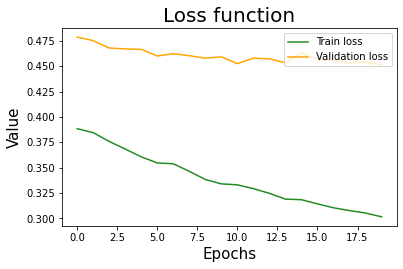

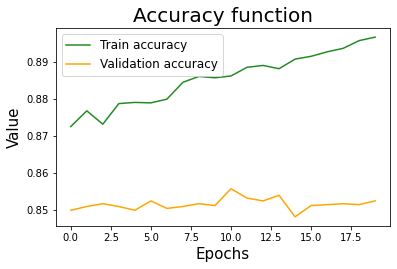

In [53]:
loss_plotter(history)

Classification report:
              precision    recall  f1-score   support

           0       0.43      0.90      0.58      1144
           1       0.99      0.88      0.93     15351
           2       0.85      0.97      0.91      3329

    accuracy                           0.90     19824
   macro avg       0.76      0.91      0.81     19824
weighted avg       0.93      0.90      0.91     19824



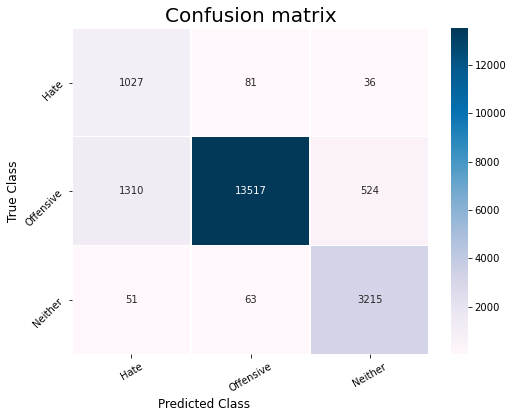

Wall time: 1.01 s


In [54]:
%%time
# performance on TRAIN
y_pred = np.argmax(model.predict(X_train), axis = 1)
y_train_n = np.argmax(y_train, axis = 1)
print('Classification report:')
print(classification_report(y_train_n, y_pred))
c_matrix(y_train_n, y_pred, ["Hate", "Offensive", "Neither"])

Classification report:
              precision    recall  f1-score   support

           0       0.29      0.60      0.39       286
           1       0.96      0.85      0.91      3838
           2       0.79      0.92      0.85       833

    accuracy                           0.85      4957
   macro avg       0.68      0.79      0.72      4957
weighted avg       0.90      0.85      0.87      4957



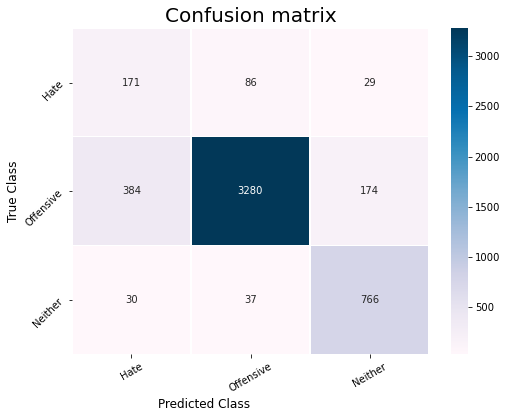

Wall time: 555 ms


In [56]:
%%time
# performance on TEST
y_pred = np.argmax(model.predict(X_test), axis = 1)
y_test_n = np.argmax(y_test, axis = 1)
print('Classification report:')
print(classification_report(y_test_n, y_pred))
c_matrix(y_test_n, y_pred, ["Hate", "Offensive", "Neither"])